**Feature Set**

The training set contains the following 3 features (for Supervised Learning)
1. qid - unique question identifier
2. question_text - Quora question text
3. target - a question labeled "insincere" has a value of 1, otherwise 0

In [48]:
# all import statements
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
#from wordcloud import WordCloud as wc   # not needed
from nltk.corpus import stopwords
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
from pandas import get_dummies
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import warnings
import sklearn
import string
import scipy
import numpy
import nltk
import json
import sys
import csv
import os

# EDA 


In [49]:
# I start Collection Data by reading training and testing datasets 
# into Pandas DataFrames.

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [50]:
# check top 5 records of training dataset
train.head() 

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


In [51]:
# check top 5 records of testing dataset
test.head() 

,qid,question_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...
3,000086e4b7e1c7146103,Who are entrepreneurs?
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?


In [52]:
# type of features in Quora dataset

print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306122 entries, 0 to 1306121
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   qid            1306122 non-null  object
 1   question_text  1306122 non-null  object
 2   target         1306122 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 29.9+ MB
None


In [53]:
print(test.info())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375806 entries, 0 to 375805
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   qid            375806 non-null  object
 1   question_text  375806 non-null  object
dtypes: object(2)
memory usage: 5.7+ MB
None


In [54]:
# shape for train and test
print('Shape of train:',train.shape)
print('Shape of test:',test.shape)

Shape of train: (1306122, 3)
Shape of test: (375806, 2)


# Data Cleaning

In [55]:
# cool, No NA values

train.isnull().sum()


qid              0
question_text    0
target           0
dtype: int64

In [56]:
# in case , their were NA or None values in any row then we would drop the row.

# remove rows that have NA's
print('Before Droping',train.shape)
train = train.dropna()
print('After Droping',train.shape)

Before Droping (1306122, 3)
After Droping (1306122, 3)


In [57]:
# Number of words in the text

train["num_words"] = train["question_text"].apply(lambda x: len(str(x).split()))
test["num_words"] = test["question_text"].apply(lambda x: len(str(x).split()))
print('max words in train',train["num_words"].max())
print('min words in train',train["num_words"].min())
print("max words in test",test["num_words"].max())
print('min words in train',test["num_words"].min())

max words in train 134
min words in train 1
max words in test 87
min words in train 1


In [58]:
# Number of unique words

train["num_unique_words"] = train["question_text"].apply(lambda x: len(set(str(x).split())))
test["num_unique_words"] = test["question_text"].apply(lambda x: len(set(str(x).split())))

print('maxi unique_words in train',train["num_unique_words"].max())

print("max unique_words in test",test["num_unique_words"].max())


maxi unique_words in train 96
max unique_words in test 61


In [59]:
# Number of stopwords in the text

#from nltk.corpus import stopwords
eng_stopwords = set(stopwords.words("english"))

train["num_stopwords"] = train["question_text"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))
test["num_stopwords"] = test["question_text"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))

train["num_punctuations"] =train['question_text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]) )
test["num_punctuations"] =test['question_text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]) )

print('maximum of num_stopwords in train',train["num_stopwords"].max())
print("maximum of num_stopwords in test",test["num_stopwords"].max())


maximum of num_stopwords in train 56
maximum of num_stopwords in test 47


In [60]:
# Number of punctuations in the text ( from string.punctuation)

train["num_punctuations"] =train['question_text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]) )
test["num_punctuations"] =test['question_text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]) )
print('maximum of num_punctuations in train',train["num_punctuations"].max())
print("maximum of num_punctuations in test",test["num_punctuations"].max())

maximum of num_punctuations in train 411
maximum of num_punctuations in test 505


In [61]:
# You see number of unique item for Target with command below:
train_target = train['target'].values

np.unique(train_target)


array([0, 1], dtype=int64)

# data imbalance

In [62]:
#train.where(train ['target']==1).count()
train[train.target==1].count()

qid                 80810
question_text       80810
target              80810
num_words           80810
num_unique_words    80810
num_stopwords       80810
num_punctuations    80810
dtype: int64

In [121]:
1306122- 80810

1225312

In [63]:
train.where?

In [64]:
train.shape

(1306122, 7)

In [65]:
print("% of un-sincere qns is ", 80810/1306122)

% of un-sincere qns is  0.06187017751787352


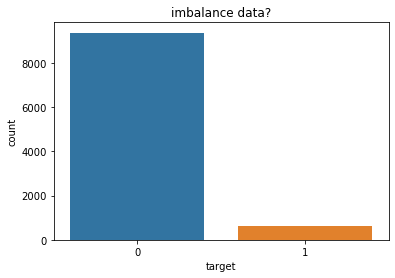

In [142]:
# plot imbalanced data

ax=sns.countplot(x='target', data=train  ,linewidth=5)
plt.title('imbalance data?');

Data Preprocessing
----

1. Change all the text to lower case

2. Word Tokenization

3. Remove Stop words

4. Remove Non-alpha text

5. Word Lemmatization

6. Converting the text data into Numeric vectors( called Vectorization )

In [67]:
# step 1: Change all the text to lower case. 


train['question_text'] = [entry.lower() for entry in train['question_text']]

test['question_text'] = [entry.lower() for entry in test['question_text']]

train.head()

,qid,question_text,target,num_words,num_unique_words,num_stopwords,num_punctuations
0,00002165364db923c7e6,how did quebec nationalists see their province...,0,13,13,7,1
1,000032939017120e6e44,"do you have an adopted dog, how would you enco...",0,16,15,9,2
2,0000412ca6e4628ce2cf,why does velocity affect time? does velocity a...,0,10,8,3,2
3,000042bf85aa498cd78e,how did otto von guericke used the magdeburg h...,0,9,9,3,1
4,0000455dfa3e01eae3af,can i convert montra helicon d to a mountain b...,0,15,15,8,1


In [72]:
# more imports for NLP
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score

In [74]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [122]:
# trainbackup=train.copy()
# testbackup=test.copy()
# trainbackup.shape

train = trainbackup.copy()
test = testbackup.copy()

In [123]:
train= train.head(10000)
test= test.head(10000)

In [125]:
train.head()

,qid,question_text,target,num_words,num_unique_words,num_stopwords,num_punctuations
0,00002165364db923c7e6,how did quebec nationalists see their province...,0,13,13,7,1
1,000032939017120e6e44,"do you have an adopted dog, how would you enco...",0,16,15,9,2
2,0000412ca6e4628ce2cf,why does velocity affect time? does velocity a...,0,10,8,3,2
3,000042bf85aa498cd78e,how did otto von guericke used the magdeburg h...,0,9,9,3,1
4,0000455dfa3e01eae3af,can i convert montra helicon d to a mountain b...,0,15,15,8,1


In [126]:
# step 2 : Tokenization : In this each entry in the corpus will be broken 
#                         into set of words


train['question_text']= [word_tokenize(entry) for entry in train['question_text']]

test['question_text']= [word_tokenize(entry) for entry in test['question_text']]

train.head()

,qid,question_text,target,num_words,num_unique_words,num_stopwords,num_punctuations
0,00002165364db923c7e6,"[how, did, quebec, nationalists, see, their, p...",0,13,13,7,1
1,000032939017120e6e44,"[do, you, have, an, adopted, dog, ,, how, woul...",0,16,15,9,2
2,0000412ca6e4628ce2cf,"[why, does, velocity, affect, time, ?, does, v...",0,10,8,3,2
3,000042bf85aa498cd78e,"[how, did, otto, von, guericke, used, the, mag...",0,9,9,3,1
4,0000455dfa3e01eae3af,"[can, i, convert, montra, helicon, d, to, a, m...",0,15,15,8,1


In [127]:
# Set random seed

np.random.seed(500)

In [128]:
# step 3, 4 and 5
# Remove Stop words and Numeric data 
# and perfom Word Stemming/Lemmenting.

# WordNetLemmatizer requires Pos tags to understand if the word is noun or verb
# or adjective etc. By default it is set to Noun

tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV
# the tag_map would map any tag to 'N' (Noun) except
# Adjective to J, Verb -> v, Adverb -> R
# that means if you get a Pronoun then it would still be mapped to Noun
# print(pos_tag(['my','name','is','omkar']))



In [129]:
defaultdict

collections.defaultdict

In [130]:
pos_tag(train['question_text'][0])

[('how', 'WRB'),
 ('did', 'VBD'),
 ('quebec', 'VB'),
 ('nationalists', 'NNS'),
 ('see', 'VBP'),
 ('their', 'PRP$'),
 ('province', 'NN'),
 ('as', 'IN'),
 ('a', 'DT'),
 ('nation', 'NN'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('1960s', 'CD'),
 ('?', '.')]

In [131]:
# step 3, 4 and 5
# Remove Stop words and Numeric data 
# and perfom Word Stemming/Lemmenting.

# WordNetLemmatizer requires Pos tags to understand if the word is noun or verb
# or adjective etc. By default it is set to Noun
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV
# the tag_map would map any tag to 'N' (Noun) except
# Adjective to J, Verb -> v, Adverb -> R
# that means if you get a Pronoun then it would still be mapped to Noun


for index,entry in enumerate(train['question_text']):
    # Declaring Empty List to store the words that follow the rules for this step
    Final_words = []
    
    # Initializing WordNetLemmatizer()
    word_Lemmatized = WordNetLemmatizer()
    #print(help(pos_tag(entry)))
    # pos_tag function below will provide the 'tag' 
    # i.e if the word is Noun(N) or Verb(V) or something else.
    for word, tag in pos_tag(entry):
    
        # Below condition is to check for Stop words and consider only alphabets
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            
            Final_words.append(word_Final)
    #print(Final_words)        
    # The final processed set of words for each iteration will be stored 
    # in 'question_text_final'
    train.loc[index,'question_text_final'] = str(Final_words)
    
    
    
    

In [132]:
#### same for test data


# step 3, 4 and 5
# Remove Stop words and Numeric data 
# and perfom Word Stemming/Lemmenting.

# WordNetLemmatizer requires Pos tags to understand if the word is noun or verb
# or adjective etc. By default it is set to Noun
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV
# the tag_map would map any tag to 'N' (Noun) except
# Adjective to J, Verb -> v, Adverb -> R
# that means if you get a Pronoun then it would still be mapped to Noun


for index,entry in enumerate(test['question_text']):
    # Declaring Empty List to store the words that follow the rules for this step
    Final_words_test = []
    
    # Initializing WordNetLemmatizer()
    word_Lemmatized = WordNetLemmatizer()
    
    # pos_tag function below will provide the 'tag' 
    # i.e if the word is Noun(N) or Verb(V) or something else.
    for word, tag in pos_tag(entry):
        # Below condition is to check for Stop words and consider only 
        # alphabets
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words_test.append(word_Final)
            
    # The final processed set of words for each iteration will be stored 
    # in 'question_text_final'
    test.loc[index,'question_text_final'] = str(Final_words_test)
    

In [133]:
test.head()

,qid,question_text,num_words,num_unique_words,num_stopwords,num_punctuations,question_text_final
0,0000163e3ea7c7a74cd7,"[why, do, so, many, women, become, so, rude, a...",21,19,11,1,"['many', 'woman', 'become', 'rude', 'arrogant'..."
1,00002bd4fb5d505b9161,"[when, should, i, apply, for, rv, college, of,...",30,23,17,2,"['apply', 'rv', 'college', 'engineering', 'bms..."
2,00007756b4a147d2b0b3,"[what, is, it, really, like, to, be, a, nurse,...",10,10,6,1,"['really', 'like', 'nurse', 'practitioner']"
3,000086e4b7e1c7146103,"[who, are, entrepreneurs, ?]",3,3,2,1,['entrepreneur']
4,0000c4c3fbe8785a3090,"[is, education, really, making, good, people, ...",7,7,1,1,"['education', 'really', 'make', 'good', 'peopl..."


 # Vectorising

In [134]:
Tfidf_vect = TfidfVectorizer()
Tfidf_vect.fit(train['question_text_final'])

Train_X_Tfidf = Tfidf_vect.transform(train['question_text_final'])

Test_X_Tfidf = Tfidf_vect.transform(test['question_text_final'])

In [135]:
print(Train_X_Tfidf)
#print(Test_X_Tfidf)

  (0, 9535)	0.3027305836970476
  (0, 8676)	0.4981261355183682
  (0, 8566)	0.4981261355183682
  (0, 7219)	0.5202921340044759
  (0, 7216)	0.37601993991620425
  (1, 11908)	0.1894557262867528
  (1, 9700)	0.33815257847445757
  (1, 7993)	0.1947814018797523
  (1, 3539)	0.3653055447844994
  (1, 3158)	0.30877290284131126
  (1, 164)	0.7635644834266739
  (2, 11481)	0.6855299346053622
  (2, 10850)	0.20229971113170225
  (2, 10029)	0.27721701635830365
  (2, 4426)	0.3659745971540918
  (2, 207)	0.5275763979892372
  (3, 11624)	0.42872789761620106
  (3, 11369)	0.2054703077844136
  (3, 7705)	0.44780576013313866
  (3, 6442)	0.44780576013313866
  (3, 4842)	0.41519193874558324
  (3, 4652)	0.44780576013313866
  (4, 11153)	0.3974358052940644
  (4, 7070)	0.4077468402555652
  (4, 7018)	0.43977584028772576
  :	:
  (9995, 7610)	0.2033905284516744
  (9995, 7605)	0.16546434561451356
  (9995, 6363)	0.3092408615517507
  (9995, 4630)	0.3335320996110778
  (9995, 4056)	0.17682419472258193
  (9995, 2832)	0.30924086155175

In [136]:
# all words from the Tfidf vectors and their relavant number
print(Tfidf_vect.vocabulary_)

{'quebec': 8676, 'nationalist': 7219, 'see': 9535, 'province': 8566, 'nation': 7216, 'adopt': 164, 'dog': 3158, 'would': 11908, 'encourage': 3539, 'people': 7993, 'shop': 9700, 'velocity': 11481, 'affect': 207, 'time': 10850, 'space': 10029, 'geometry': 4426, 'otto': 7705, 'von': 11624, 'guericke': 4652, 'use': 11369, 'magdeburg': 6442, 'hemisphere': 4842, 'convert': 2400, 'montra': 7018, 'helicon': 4833, 'mountain': 7070, 'bike': 1165, 'change': 1825, 'tyre': 11153, 'gaza': 4382, 'slowly': 9892, 'become': 1032, 'auschwitz': 802, 'dachau': 2661, 'treblinka': 11033, 'palestinian': 7820, 'quora': 8692, 'automatically': 826, 'ban': 924, 'conservative': 2319, 'opinion': 7629, 'report': 9034, 'liberal': 6187, 'view': 11540, 'crazy': 2524, 'wash': 11690, 'wipe': 11843, 'grocery': 4635, 'germ': 4435, 'everywhere': 3740, 'thing': 10789, 'dress': 3238, 'moderately': 6958, 'different': 2989, 'modestly': 6964, 'ever': 3731, 'phase': 8070, 'wherein': 11779, 'ignorant': 5158, 'love': 6358, 'complet

Data Pre-processing is over !!
---

# use ML algo

In [137]:
# print(Train_X_Tfidf)

In [138]:


# fit the training dataset on the NB classifier
Naive = naive_bayes.MultinomialNB()

Naive.fit(Train_X_Tfidf,train['target'])

# predict the labels on validation dataset
predictions_NB = Naive.predict(Test_X_Tfidf)

# Use accuracy_score function to get the accuracy
print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, train['target'])*100)
print(predictions_NB)

Naive Bayes Accuracy Score ->  93.63
[0 0 0 ... 0 0 0]


In [139]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')

SVM.fit(Train_X_Tfidf,train['target'])

# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)

# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, train['target'])*100)
print(predictions_SVM)
predictions_SVM[0]



SVM Accuracy Score ->  92.58
[0 0 0 ... 0 0 0]


0

In [140]:
predSVM=pd.DataFrame(predictions_SVM)
print('SVM prediction ')
print(predSVM[0].value_counts())
predNB=pd.DataFrame(predictions_NB)
print()
print('NB prediction ')
print(predNB[0].value_counts())


SVM prediction 
0    9877
1     123
Name: 0, dtype: int64

NB prediction 
0    10000
Name: 0, dtype: int64
